<a href="https://colab.research.google.com/github/mrgeeko/portfolio-part-1-48017655-Al-Amin-Md-Rafiul-Hossain-/blob/main/portfolio_part_1_48017655(Al_Amin_Md_Rafiul_Hossain).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [3]:
your_name = "Al Amin Md Rafiul Hossain"
your_student_id = "48017655"

In [7]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [8]:
# Display Dataframe
file_path = '/content/drive/My Drive/car_sell.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)
print(df.head(5))
print('============================================')
print("Number of rows", df.shape[0])
df

   Unnamed: 0                      name    year  selling_price  km_driven  \
0           0             Maruti 800 AC  2007.0          60000      70000   
1           1  Maruti Wagon R LXI Minor  2007.0         135000      50000   
2           2      Hyundai Verna 1.6 SX  2012.0         600000     100000   
3           3    Datsun RediGO T Option  2017.0         250000      46000   
4           4     Honda Amaze VX i-DTEC  2014.0         450000     141000   

     fuel seller_type transmission         owner  
0  Petrol  Individual       Manual   First Owner  
1  Petrol  Individual       Manual   First Owner  
2  Diesel  Individual       Manual   First Owner  
3  Petrol  Individual       Manual   First Owner  
4  Diesel  Individual       Manual  Second Owner  
Number of rows 4340


,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014.0,409999,80000,Diesel,Individual,Manual,Second Owner
4336,4336,Hyundai i20 Magna 1.4 CRDi,2014.0,409999,80000,Diesel,Individual,Manual,Second Owner
4337,4337,Maruti 800 AC BSIII,2009.0,110000,83000,Petrol,Individual,Manual,Second Owner
4338,4338,Hyundai Creta 1.6 CRDi SX Option,2016.0,865000,90000,Diesel,Individual,Manual,First Owner


In [9]:
# Count the number of null values in gender,rating,helpfulness and review
print("Missing year values:", len(df[df['year'].isnull()== True]))
print("fuel is none:", len(df[df['fuel']== 'none']))

Missing year values: 310
fuel is none: 159


In [10]:
remove_NaN_values = df.dropna(subset=['year'])
clean_df1 = remove_NaN_values[remove_NaN_values['fuel']!='none']
print("Length/Shape of clean dataframe",clean_df1.shape)
print("Number of rows", clean_df1.shape[0])

Length/Shape of clean dataframe (3886, 9)
Number of rows 3886


In [11]:
#Length of data before and after
print("Length of data before missing values removed", df.shape[0])
print("Length of data after missing values removed", clean_df1.shape[0])

Length of data before missing values removed 4340
Length of data after missing values removed 3886


## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [12]:
#Q2.1 Finding the number of unique values
print("Number of unique name:",len(clean_df1['name'].unique()))
print("Number of unique seller_type:",len(clean_df1['seller_type'].unique()))
print("Number of unique transmission:",len(clean_df1['transmission'].unique()))
print("Number of unique owner:",len(clean_df1['owner'].unique()))

Number of unique name: 1402
Number of unique seller_type: 3
Number of unique transmission: 2
Number of unique owner: 5


In [13]:
#Q2.2 Descriptive status
print(clean_df1['km_driven'].describe())

count      3886.000000
mean      66313.279207
std       46679.603916
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64


In [14]:
#Q2.3 Descriptive status
grouped_seller_type = clean_df1.groupby('seller_type')  # Grouping the data by seller_type
print(grouped_seller_type['selling_price'].count())         # Printing the number of item count based on seller_type
grouped_seller_type['selling_price'].count().describe()     # Summary of the data

seller_type
Dealer               889
Individual          2903
Trustmark Dealer      94
Name: selling_price, dtype: int64


,selling_price
count,3.000000
mean,1295.333333
std,1447.912405
min,94.000000
25%,491.500000
50%,889.000000
75%,1896.000000
max,2903.000000


In [15]:
#Q2.4 Descriptive status
grouped_owner = clean_df1.groupby('owner')   # Grouping the data by item
print(grouped_owner['year'].count())      # Printing the rating count based on item
grouped_owner['year'].count().describe()  # Summary of the data

owner
First Owner             2532
Fourth & Above Owner      67
Second Owner            1000
Test Drive Car            14
Third Owner              273
Name: year, dtype: int64


,year
count,5.000000
mean,777.200000
std,1057.123314
min,14.000000
25%,67.000000
50%,273.000000
75%,1000.000000
max,2532.000000


## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

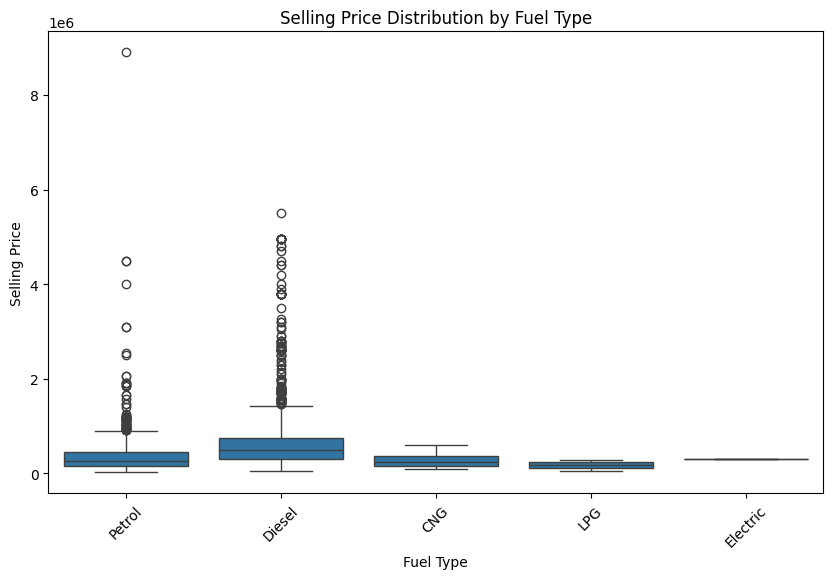

This plot shows the distribution of selling prices for different fuel types. It helps us understand if certain fuel types have a significant impact on the selling price.


In [24]:
# Correlation between fuel and selling price
plt.figure(figsize=(10, 6))
plt.title('Selling Price Distribution by Fuel Type')
sns.boxplot(x='fuel', y='selling_price', data=clean_df1)
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()
print("This plot shows the distribution of selling prices for different fuel types. It helps us understand if certain fuel types have a significant impact on the selling price.")


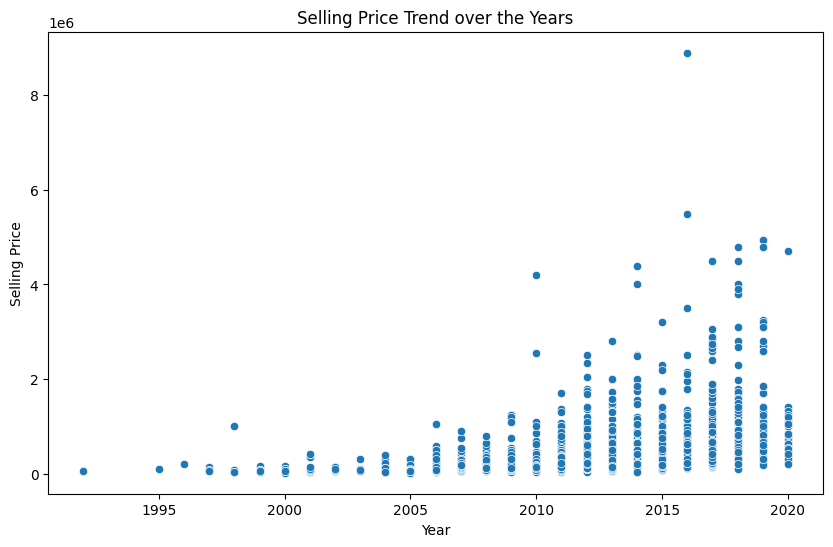

This scatter plot shows how the selling price changes over the years. It helps us identify any trends or patterns in the pricing based on the year of the car.


In [23]:
# Correlation between year and selling price
plt.figure(figsize=(10, 6))
plt.title('Selling Price Trend over the Years')
sns.scatterplot(x='year', y='selling_price', data=clean_df1)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()
print("This scatter plot shows how the selling price changes over the years. It helps us identify any trends or patterns in the pricing based on the year of the car.")

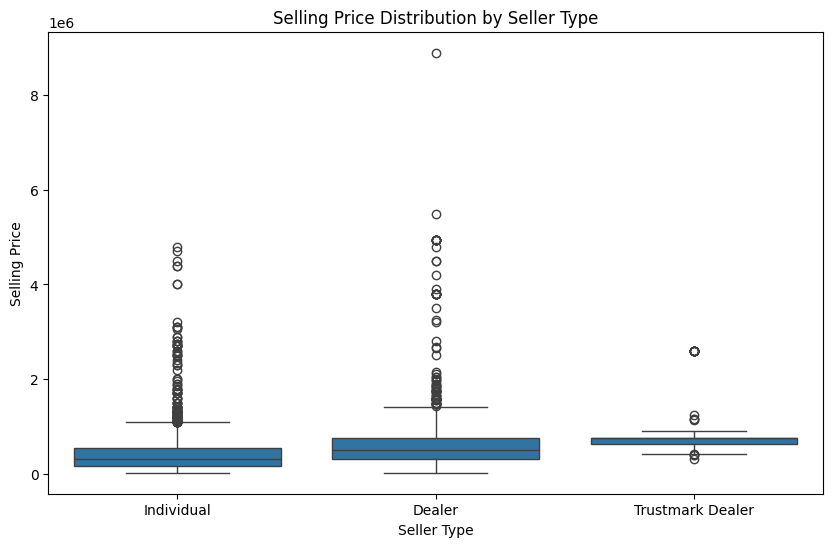

This plot compares the selling prices of cars sold by individual sellers and dealers. It helps us understand if the seller type influences the price.


In [25]:
# Correlation between seller type and selling price
plt.figure(figsize=(10, 6))
plt.title('Selling Price Distribution by Seller Type')
sns.boxplot(x='seller_type', y='selling_price', data=clean_df1)
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()
print("This plot compares the selling prices of cars sold by individual sellers and dealers. It helps us understand if the seller type influences the price.")

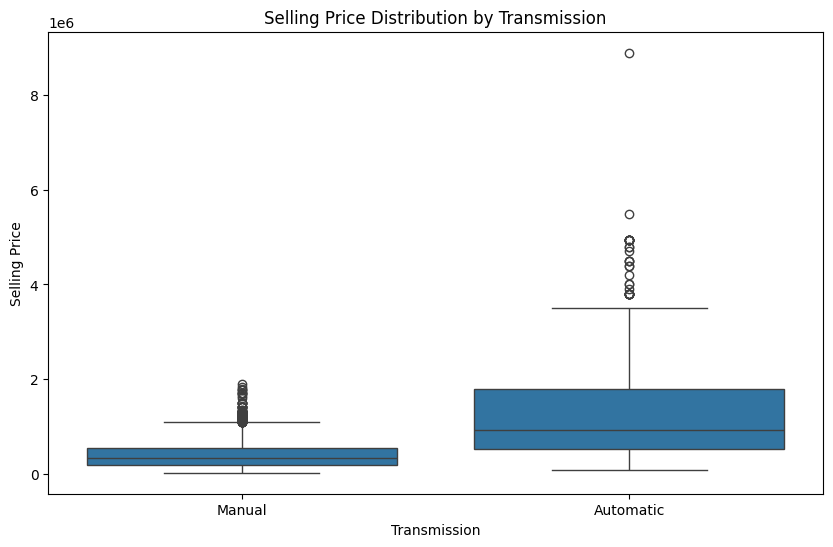

This plot shows the difference in selling prices between automatic and manual transmission cars. It helps us understand if the transmission type affects the price.


In [26]:
# Correlation between transmission and selling price
plt.figure(figsize=(10, 6))
plt.title('Selling Price Distribution by Transmission')
sns.boxplot(x='transmission', y='selling_price', data=clean_df1)
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()
print("This plot shows the difference in selling prices between automatic and manual transmission cars. It helps us understand if the transmission type affects the price.")

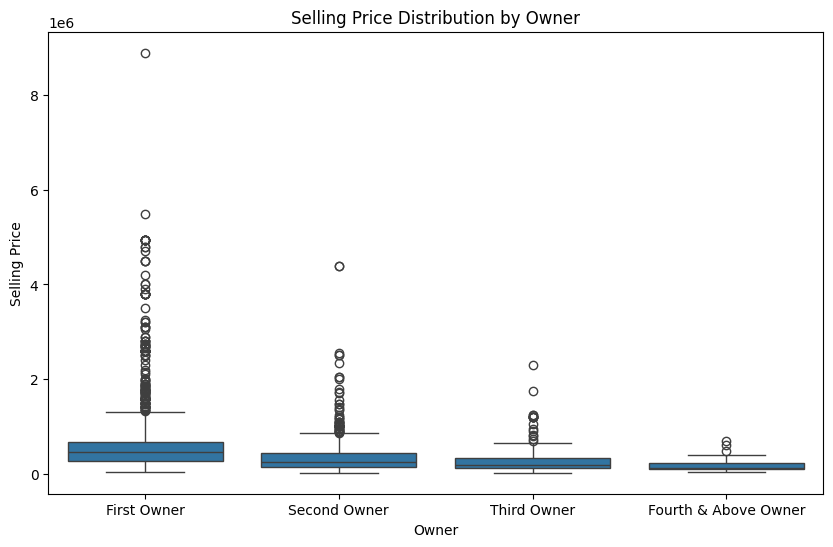

This plot shows how the number of previous owners impacts the selling price. It helps us understand if cars with fewer previous owners tend to sell at higher prices.


In [27]:
# Correlation between owner and selling price
plt.figure(figsize=(10, 6))
plt.title('Selling Price Distribution by Owner')
sns.boxplot(x='owner', y='selling_price', data=clean_df1, order=['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'])
plt.xlabel('Owner')
plt.ylabel('Selling Price')
plt.show()
print("This plot shows how the number of previous owners impacts the selling price. It helps us understand if cars with fewer previous owners tend to sell at higher prices.")

## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [22]:
data = pd.read_csv(file_path)

# Define the criteria for filtering
owner_criteria = ['First Owner', 'Second Owner', 'Third Owner']
fuel_criteria = ['Diesel', 'Petrol']
seller_type_criteria = ['Dealer', 'Individual']

# Filter the dataset
filtered_data = data[
    (data['owner'].isin(owner_criteria)) &
    (data['fuel'].isin(fuel_criteria)) &
    (data['seller_type'].isin(seller_type_criteria))
]

# Print the length of the filtered data
print(len(filtered_data))

3929
